# TIME SERIES FORECASTING

# Importing packages

In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

# Load Data

In [2]:
data=pd.read_csv('train_csv.csv')

In [3]:
data.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


# Data Preparations

In [4]:
#checking the dimensions
data.shape

(80, 3)

In [5]:
data.size

240

In [6]:
#describe gives some basic statistical summary
data.describe()

,id,feature
count,80.0000,80.000000
mean,39.5000,147.496375
std,23.2379,96.846260
min,0.0000,21.360000
25%,19.7500,66.730000
50%,39.5000,125.240000
75%,59.2500,199.820000
max,79.0000,469.720000


In [7]:
#info gives information abt datatype of col,non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
id         80 non-null int64
time       80 non-null object
feature    80 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
#checking for null values
data.isnull().sum()

id         0
time       0
feature    0
dtype: int64

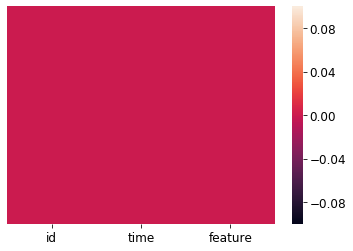

In [9]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False)

In [10]:
data.drop('id',axis=1,inplace=True)

In [11]:
data.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


In [12]:
data['time'].min(),data['time'].max()

('2019-03-19 00:00:00', '2019-03-19 00:13:10')

In [13]:
data=data.sort_values('time')
data

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70
...,...,...
75,2019-03-19 00:12:30,469.72
76,2019-03-19 00:12:40,406.79
77,2019-03-19 00:12:50,128.91
78,2019-03-19 00:13:00,85.28


In [14]:
#data=data.groupby('time')['feature'].sum()
#data.reset_index('time')

In [15]:
data['time']=pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

In [16]:
data.set_index('time',inplace=True)
data.index

DatetimeIndex(['2019-03-19 00:00:00', '2019-03-19 00:00:10',
               '2019-03-19 00:00:20', '2019-03-19 00:00:30',
               '2019-03-19 00:00:40', '2019-03-19 00:00:50',
               '2019-03-19 00:01:00', '2019-03-19 00:01:10',
               '2019-03-19 00:01:20', '2019-03-19 00:01:30',
               '2019-03-19 00:01:40', '2019-03-19 00:01:50',
               '2019-03-19 00:02:00', '2019-03-19 00:02:10',
               '2019-03-19 00:02:20', '2019-03-19 00:02:30',
               '2019-03-19 00:02:40', '2019-03-19 00:02:50',
               '2019-03-19 00:03:00', '2019-03-19 00:03:10',
               '2019-03-19 00:03:20', '2019-03-19 00:03:30',
               '2019-03-19 00:03:40', '2019-03-19 00:03:50',
               '2019-03-19 00:04:00', '2019-03-19 00:04:10',
               '2019-03-19 00:04:20', '2019-03-19 00:04:30',
               '2019-03-19 00:04:40', '2019-03-19 00:04:50',
               '2019-03-19 00:05:00', '2019-03-19 00:05:10',
               '2019-03-

In [17]:
#d=data.resample('20s').mean()

In [18]:
data

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70
...,...
2019-03-19 00:12:30,469.72
2019-03-19 00:12:40,406.79
2019-03-19 00:12:50,128.91


# Visualizing the data

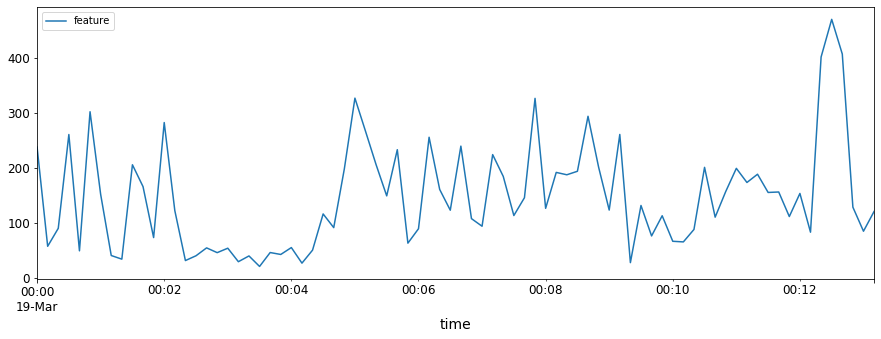

In [19]:
data.plot(figsize=(15,5))
plt.show()

# Checking the stationarity

In [20]:
#we are checking for stationarity
#here we are using ADF,,,,Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary.
#from pandas import Series
from statsmodels.tsa.stattools import adfuller
result=adfuller(data['feature'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.945866
p-value: 0.000000
Critical Values:
	1%: -3.516
	5%: -2.899
	10%: -2.587


###### since statistic value -3.516 is less then -5.945866 at 1%.we can neglect null hypothesis with significane values leass then 1%

since p value is less then 0.05 we can reject null hypothesis and has no unit root.The data is stationary

# Decomposing

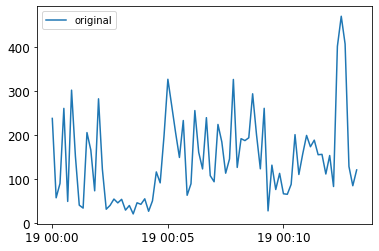

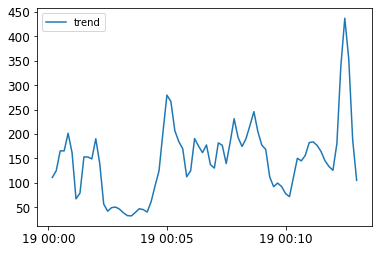

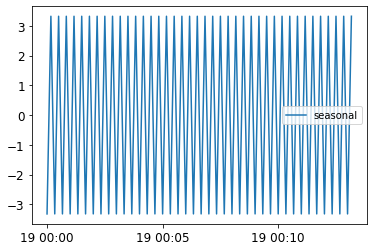

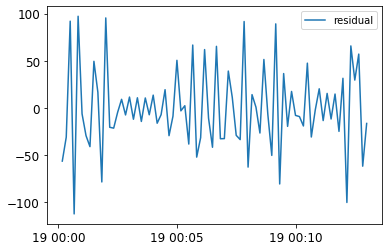

In [21]:
#Decomposing the time series into three distinct components: trend, seasonality, and noise.
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data,freq=2)

plt.plot(data,label='original')
plt.legend(loc='best')

trend=decomp.trend
plt.show()
plt.plot(trend,label='trend')
plt.legend(loc='best')

seasonal=decomp.seasonal
plt.show()
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

residual=decomp.resid
plt.show()
plt.plot(residual,label='residual')
plt.legend(loc='best')


# Time Series Forecasting using ARIMA
##We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data

In [22]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(i[0],i[1],i[2],12) for i in pdq]
print('example for parameter combination for seasonal ARIMA:')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[4]))

example for parameter combination for seasonal ARIMA:
SARIMAX:(0, 0, 1) x (0, 0, 1, 12)
SARIMAX:(0, 0, 1) x (0, 1, 0, 12)
SARIMAX:(0, 1, 0) x (0, 1, 1, 12)
SARIMAX:(0, 1, 0) x (1, 0, 0, 12)


We use 'grid search' to find the optimal set of parameters that yields the best performance for our model

In [25]:
from pylab import rcParams
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(data['feature'], order=param,
                                        seasonal_order=seasonal_param,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            res=mod.fit()
            print('ARIMA {}x{}12 - AIC{}'.format(param,seasonal_param,res.aic))
        except:
            continue

ARIMA (0, 0, 0)x(0, 0, 0, 12)12 - AIC1042.4035372531396
ARIMA (0, 0, 0)x(0, 0, 1, 12)12 - AIC865.3374454694663
ARIMA (0, 0, 0)x(0, 1, 0, 12)12 - AIC848.4679420629242
ARIMA (0, 0, 0)x(0, 1, 1, 12)12 - AIC680.124108199419
ARIMA (0, 0, 0)x(1, 0, 0, 12)12 - AIC856.5691270639311
ARIMA (0, 0, 0)x(1, 0, 1, 12)12 - AIC834.0048626489346
ARIMA (0, 0, 0)x(1, 1, 0, 12)12 - AIC696.4451555075179
ARIMA (0, 0, 0)x(1, 1, 1, 12)12 - AIC682.8849026065133
ARIMA (0, 0, 1)x(0, 0, 0, 12)12 - AIC988.174001382783
ARIMA (0, 0, 1)x(0, 0, 1, 12)12 - AIC821.6035769113843
ARIMA (0, 0, 1)x(0, 1, 0, 12)12 - AIC827.6027531425912
ARIMA (0, 0, 1)x(0, 1, 1, 12)12 - AIC663.1898764125744
ARIMA (0, 0, 1)x(1, 0, 0, 12)12 - AIC840.3962302357428
ARIMA (0, 0, 1)x(1, 0, 1, 12)12 - AIC816.3934247694033
ARIMA (0, 0, 1)x(1, 1, 0, 12)12 - AIC691.702321561386
ARIMA (0, 0, 1)x(1, 1, 1, 12)12 - AIC664.5347022243468
ARIMA (0, 1, 0)x(0, 0, 0, 12)12 - AIC951.5451699616596
ARIMA (0, 1, 0)x(0, 0, 1, 12)12 - AIC793.1447566476646
ARIMA (0, 1,

selecting the parameters with lowest AIC value

# Fitting ARIMA model

In [27]:
mod=sm.tsa.statespace.SARIMAX(data['feature'], order=(1,1,1),
                                        seasonal_order=(0,1,1,12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
res=mod.fit()
print(res.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4032      0.125      3.218      0.001       0.158       0.649
ma.L1         -1.0000      0.200     -4.998      0.000      -1.392      -0.608
ma.S.L12      -0.6355      0.239     -2.661      0.008      -1.104      -0.167
sigma2      1.091e+04   1.83e-05   5.95e+08      0.000    1.09e+04    1.09e+04


Running model diagnostiscs to check any unusual behaviour

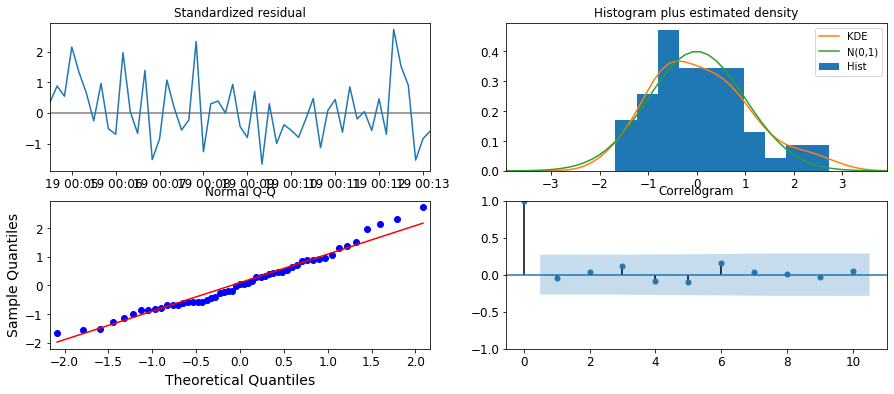

In [28]:
res.plot_diagnostics(figsize=(15,6))
plt.show()

Standardized Residual : The residuals scatters around a mean near zero, as they should, with no obvious trends or patterns

Histogram plus estimated density: The data distribution is nearly normal

Normal Q-Q : The plots show sample quantiles versus theoretical quantiles.The points seem to fall about a straight line.
    


# Validating Forecasts
We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts

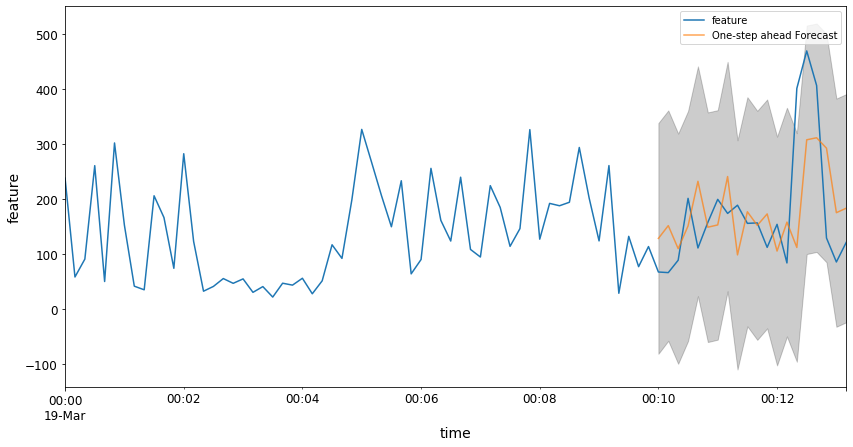

In [29]:
pred = res.get_prediction(start=pd.to_datetime('2019-03-19 00:10:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = data['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('time')
ax.set_ylabel('feature')
plt.legend()
plt.show()

The above plot indicates the observed value and the rolling forecast predications


# calculating RMSE

In [30]:
data_forecasted = pred.predicted_mean
data_truth = data['feature']['2019-03-19 00:10:00':]
mse = ((data_forecasted - data_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 103.38


# visualizing the forecast

                     lower feature  upper feature
2019-03-19 00:13:20     -84.410441     330.934961
2019-03-19 00:13:30     -72.258590     379.563199
2019-03-19 00:13:40     -65.185926     393.868633
2019-03-19 00:13:50     -65.480141     395.372954
2019-03-19 00:14:00     -73.664452     387.738611
2019-03-19 00:14:10     -87.146106     374.805818
2019-03-19 00:14:20      24.337909     486.579473
2019-03-19 00:14:30      84.820224     547.189529
2019-03-19 00:14:40      57.950985     520.373562
2019-03-19 00:14:50     -43.015464     419.428880
2019-03-19 00:15:00     -59.228915     403.224263
2019-03-19 00:15:10     -28.300643     434.156163
2019-03-19 00:15:20     -81.580715     411.025520
2019-03-19 00:15:30     -70.749022     428.438115
2019-03-19 00:15:40     -67.521622     433.470587
2019-03-19 00:15:50     -69.857572     431.727458
2019-03-19 00:16:00     -78.944058     422.862724
2019-03-19 00:16:10     -92.906157     409.550540
2019-03-19 00:16:20      18.385901     521.169471


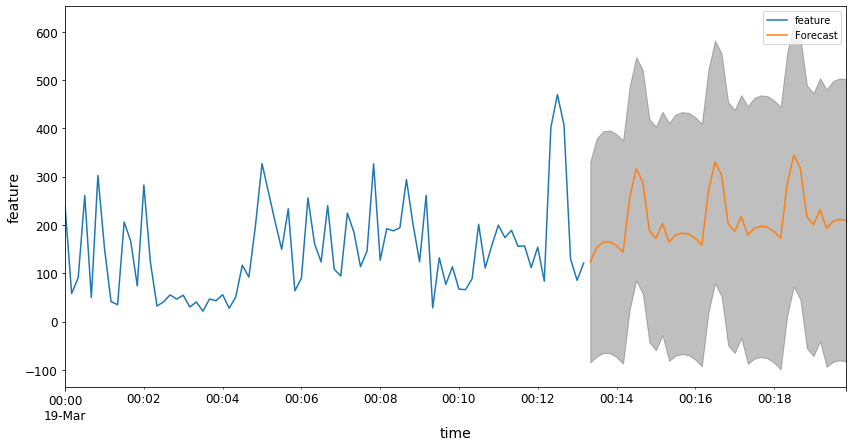

In [31]:
pred_uc = res.get_forecast(steps=40)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('time')
ax.set_ylabel('feature')
print(pred_ci)
plt.legend()
plt.show()

# conclusion
We observe that feature produces seasonal pattern.The feature increases linearly over time .

# Here we are using test data

In [427]:
pred_uc.predicted_mean

2019-03-19 00:13:20    106.877079
2019-03-19 00:13:30    150.195746
2019-03-19 00:13:40    152.372116
2019-03-19 00:13:50    170.157165
2019-03-19 00:14:00    144.927627
2019-03-19 00:14:10    135.637583
2019-03-19 00:14:20    256.664421
2019-03-19 00:14:30    325.457714
2019-03-19 00:14:40    289.009693
2019-03-19 00:14:50    183.962479
2019-03-19 00:15:00    173.534823
2019-03-19 00:15:10    203.837502
2019-03-19 00:15:20    165.223114
2019-03-19 00:15:30    179.390515
2019-03-19 00:15:40    176.474323
2019-03-19 00:15:50    178.509116
2019-03-19 00:16:00    167.465184
2019-03-19 00:16:10    144.311560
2019-03-19 00:16:20    309.001596
2019-03-19 00:16:30    377.637362
2019-03-19 00:16:40    335.283125
2019-03-19 00:16:50    191.799677
2019-03-19 00:17:00    173.986729
2019-03-19 00:17:10    205.519522
2019-03-19 00:17:20    172.323664
2019-03-19 00:17:30    192.972642
2019-03-19 00:17:40    191.188706
2019-03-19 00:17:50    196.725522
2019-03-19 00:18:00    182.527428
2019-03-19 00:

In [428]:
pred=pd.DataFrame(pred_uc.predicted_mean)


In [429]:
pred

,0
2019-03-19 00:13:20,106.877079
2019-03-19 00:13:30,150.195746
2019-03-19 00:13:40,152.372116
2019-03-19 00:13:50,170.157165
2019-03-19 00:14:00,144.927627
2019-03-19 00:14:10,135.637583
2019-03-19 00:14:20,256.664421
2019-03-19 00:14:30,325.457714
2019-03-19 00:14:40,289.009693
2019-03-19 00:14:50,183.962479


In [430]:
pred=pred.reset_index()

In [431]:
pred.drop('index',inplace=True,axis=1)

In [432]:
pred

,0
0,106.877079
1,150.195746
2,152.372116
3,170.157165
4,144.927627
5,135.637583
6,256.664421
7,325.457714
8,289.009693
9,183.962479


In [433]:
test_d=pd.read_csv('test_csv.csv')

In [434]:
test_d.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [435]:
df=pd.concat([test_d,pred],axis=1)
df

,id,time,0
0,80,2019-03-19 00:13:20,106.877079
1,81,2019-03-19 00:13:30,150.195746
2,82,2019-03-19 00:13:40,152.372116
3,83,2019-03-19 00:13:50,170.157165
4,84,2019-03-19 00:14:00,144.927627
5,85,2019-03-19 00:14:10,135.637583
6,86,2019-03-19 00:14:20,256.664421
7,87,2019-03-19 00:14:30,325.457714
8,88,2019-03-19 00:14:40,289.009693
9,89,2019-03-19 00:14:50,183.962479


In [436]:
df.to_csv('forecasted.csv',index=False)

In [353]:
df.rename(columns={'time':'Time',0:'for_feat'},inplace=True)
df.head()

,Time,for_feat
0,2019-03-19 00:13:20,106.877079
1,2019-03-19 00:13:30,150.195746
2,2019-03-19 00:13:40,152.372116
3,2019-03-19 00:13:50,170.157165
4,2019-03-19 00:14:00,144.927627


In [354]:
df['Time'].min(),df['Time'].max()

('2019-03-19 00:13:20', '2019-03-19 00:19:50')

In [355]:
df=df.sort_values('Time')
df.isnull().sum()

Time        0
for_feat    0
dtype: int64

In [356]:
df['Time']=pd.to_datetime(df['Time'],format='%Y-%m-%d %H:%M:%S', 
errors = 'coerce')
df.set_index('Time',inplace=True)
df.head()

,for_feat
Time,
2019-03-19 00:13:20,106.877079
2019-03-19 00:13:30,150.195746
2019-03-19 00:13:40,152.372116
2019-03-19 00:13:50,170.157165
2019-03-19 00:14:00,144.927627


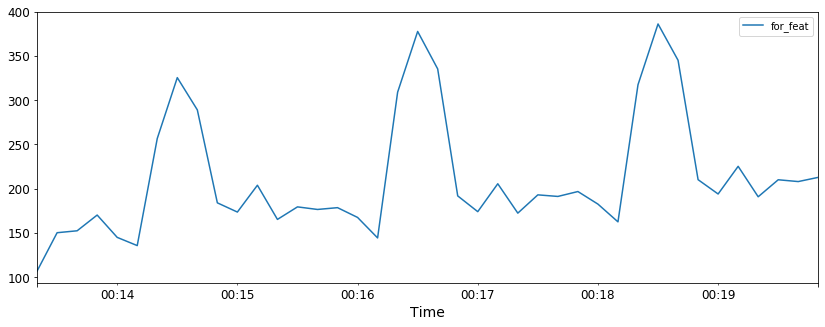

In [357]:
df.plot(figsize=(14,5))
plt.show()

In [358]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['for_feat'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.384914
p-value: 0.589487
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623


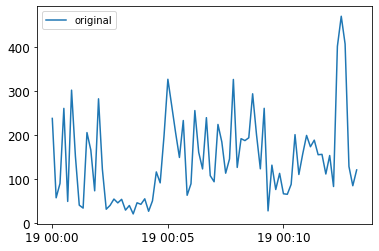

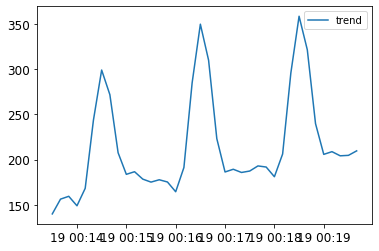

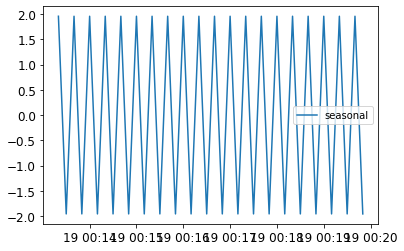

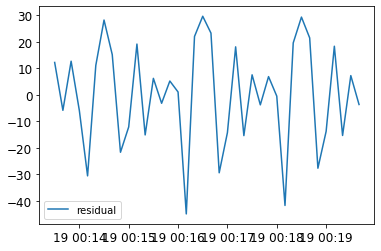

In [359]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(df,freq=2)

plt.plot(data,label='original')
plt.legend(loc='best')

trend=decomp.trend
plt.show()
plt.plot(trend,label='trend')
plt.legend(loc='best')

seasonal=decomp.seasonal
plt.show()
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

residual=decomp.resid
plt.show()
plt.plot(residual,label='residual')
plt.legend(loc='best')

In [360]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(i[0],i[1],i[2],15) for i in pdq]

In [361]:
from pylab import rcParams
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(df['for_feat'], order=param,
                                        seasonal_order=seasonal_param,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            res=mod.fit()
            print('ARIMA {}x{}15 - AIC{}'.format(param,seasonal_param,res.aic))
        except:
            continue

ARIMA (0, 0, 0)x(0, 0, 0, 15)15 - AIC535.2141118015951
ARIMA (0, 0, 0)x(0, 1, 0, 15)15 - AIC297.7310605282788
ARIMA (0, 0, 0)x(1, 0, 0, 15)15 - AIC311.3841753913197
ARIMA (0, 0, 0)x(1, 1, 0, 15)15 - AIC127.23713929604057
ARIMA (0, 0, 1)x(0, 0, 0, 15)15 - AIC480.7287103907398
ARIMA (0, 0, 1)x(0, 1, 0, 15)15 - AIC273.3271848744237
ARIMA (0, 0, 1)x(1, 0, 0, 15)15 - AIC297.3203468276394
ARIMA (0, 0, 1)x(1, 1, 0, 15)15 - AIC121.786143840554
ARIMA (0, 1, 0)x(0, 0, 0, 15)15 - AIC423.30414956023066
ARIMA (0, 1, 0)x(0, 1, 0, 15)15 - AIC283.0267792516928
ARIMA (0, 1, 0)x(1, 0, 0, 15)15 - AIC271.26980959039383
ARIMA (0, 1, 0)x(1, 1, 0, 15)15 - AIC108.6065746428717
ARIMA (0, 1, 1)x(0, 0, 0, 15)15 - AIC410.91536331001237
ARIMA (0, 1, 1)x(0, 1, 0, 15)15 - AIC269.1166280987394
ARIMA (0, 1, 1)x(1, 0, 0, 15)15 - AIC272.488809040207
ARIMA (0, 1, 1)x(1, 1, 0, 15)15 - AIC109.62145303184512
ARIMA (1, 0, 0)x(0, 0, 0, 15)15 - AIC435.43831194946057
ARIMA (1, 0, 0)x(0, 1, 0, 15)15 - AIC290.4741342793086
ARIMA 

In [362]:
mod=sm.tsa.statespace.SARIMAX(df['for_feat'], order=(1,1,1),
                                        seasonal_order=(1,1,0,15),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
res=mod.fit()
print(res.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3277      0.737     -0.445      0.656      -1.772       1.116
ma.L1          1.0000      0.830      1.205      0.228      -0.627       2.627
ar.S.L15      -0.6681      0.304     -2.198      0.028      -1.264      -0.072
sigma2      4754.1485      0.000   2.72e+07      0.000    4754.148    4754.149


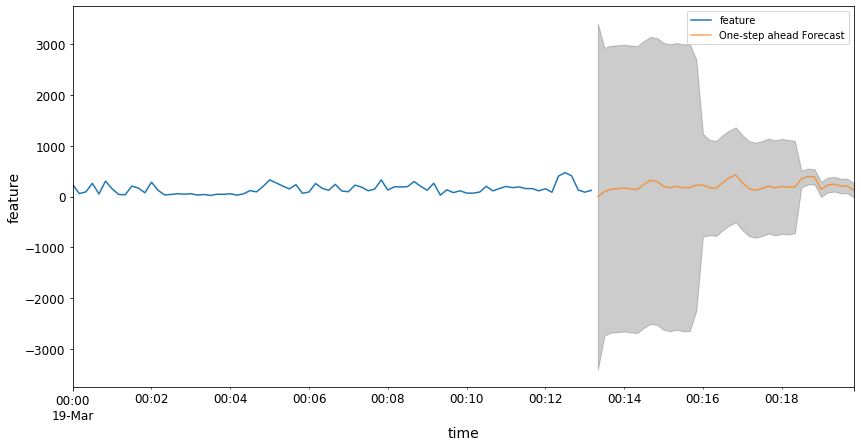

In [370]:
pred = res.get_prediction(start=pd.to_datetime('2019-03-19 00:13:20'), dynamic=False)
pred_ci = pred.conf_int()
ax = data['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('time')
ax.set_ylabel('feature')
plt.legend()
plt.show()

In [364]:
data_forecasted = pred.predicted_mean
data_truth = df['for_feat']['2019-03-19 00:13:20':]
mse = ((data_forecasted - data_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 76.34


                     lower for_feat  upper for_feat
2019-03-19 00:20:00      121.938071      404.237206
2019-03-19 00:20:10        1.467506      530.950682
2019-03-19 00:20:20      -82.261433      577.591325
2019-03-19 00:20:30     -138.189050      639.475523
2019-03-19 00:20:40     -195.951423      681.182006
2019-03-19 00:20:50     -188.390207      778.829957
2019-03-19 00:21:00     -213.985963      835.374625
2019-03-19 00:21:10     -281.214442      844.381908
2019-03-19 00:21:20     -251.642440      945.321222
2019-03-19 00:21:30     -244.830848     1019.485084
2019-03-19 00:21:40     -294.722911     1033.532213
2019-03-19 00:21:50     -432.504036      956.751340
2019-03-19 00:22:00     -467.246352      980.441008
2019-03-19 00:22:10     -474.936079     1028.914676
2019-03-19 00:22:20     -522.605690     1035.385139
2019-03-19 00:22:30     -531.374918     1105.159574
2019-03-19 00:22:40     -577.436430     1150.909246
2019-03-19 00:22:50     -620.766060     1189.328397
2019-03-19 0

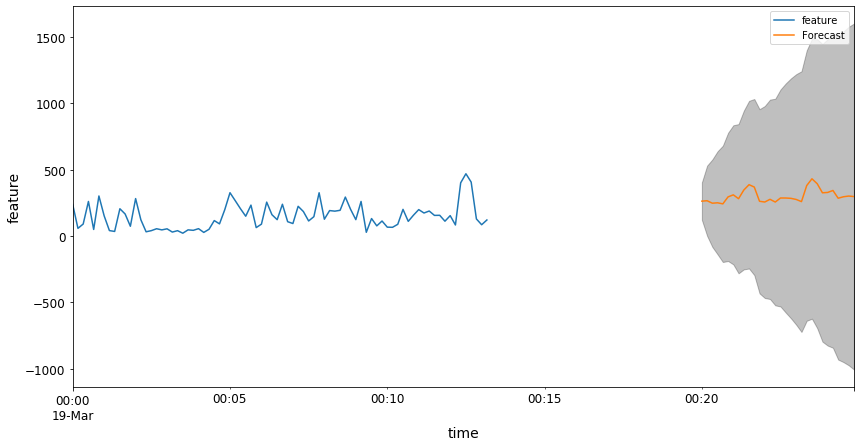

In [366]:
pred_uc = res.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('time')
ax.set_ylabel('feature')
print(pred_ci)
plt.legend()
plt.show()